In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_style('ticks')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Region Distribution

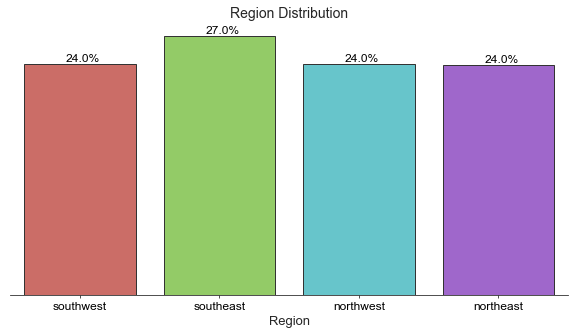

In [4]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x='region', data=df, palette="hls",orient='v',ax=ax,edgecolor='0.2')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+4, \
            str(round((i.get_height()/df.region.shape[0])*100))+'%', fontsize=12,
                color='black') 
ax.set_xlabel("Region", fontsize=13)
ax.tick_params(length=3,labelsize=12,labelcolor='black')
ax.set_title("Region Distribution", fontsize=14)
x_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

## Age Distribution by Categories

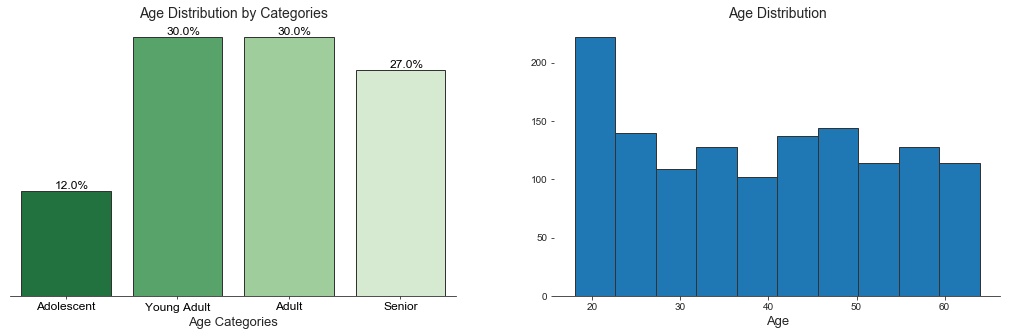

In [5]:
#Let classify age into 4 well known categories, which are 
#'Adolescent',"Young Adult","Adult","Senior"
cut_points = [17,20,35,50,65]
label_names = ['Adolescent',"Young Adult","Adult","Senior"]
df["age_cat"] = pd.cut(df["age"],cut_points,labels=label_names)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='age_cat',data=df,palette='Greens_r',orient='v',ax=ax1,edgecolor='0.2')
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+0.3, i.get_height()+3, \
            str(round((i.get_height()/df.age_cat.shape[0])*100))+'%', fontsize=12,
                color='black') 
ax2.hist('age', bins=10,data=df,edgecolor='0.2')
ax1.set_xlabel("Age Categories", fontsize=13)
ax1.tick_params(length=3,labelsize=12,labelcolor='black')
ax1.set_title("Age Distribution by Categories", fontsize=14)
ax2.set_xlabel('Age',fontsize=13)
ax2.set_title('Age Distribution',fontsize=14)
x_axis = ax1.axes.get_yaxis().set_visible(False)

f.subplots_adjust(wspace=0.22,right=1.5)
sns.despine(left=True)
plt.show()

## Age Distribution by Gender

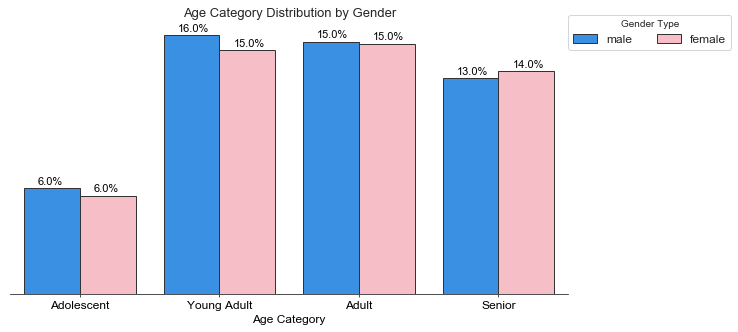

In [6]:
def gender_dist_plot(x_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x_val, data=df, palette=['dodgerblue','lightpink'],hue='sex',hue_order=['male','female'],
                  orient='v',ax=ax,edgecolor='0.2')
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3, \
                str(round((i.get_height()/df.region.shape[0])*100))+'%', fontsize=11,
                    color='black') 
    ax.set_xlabel(title, fontsize=12,color='black')
    ax.tick_params(length=3,labelsize=12,labelcolor='black')
    ax.set_title(title +' Distribution by Gender', fontsize=13)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[1,0.9],fontsize=12,title='Gender Type',ncol=2)
    sns.despine(left=True)
    return plt.show()

gender_dist_plot('age_cat','Age Category')

## Region Distribution by Gender

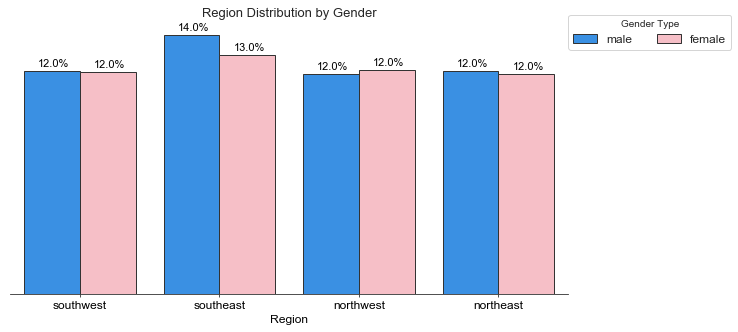

In [7]:
gender_dist_plot('region','Region')

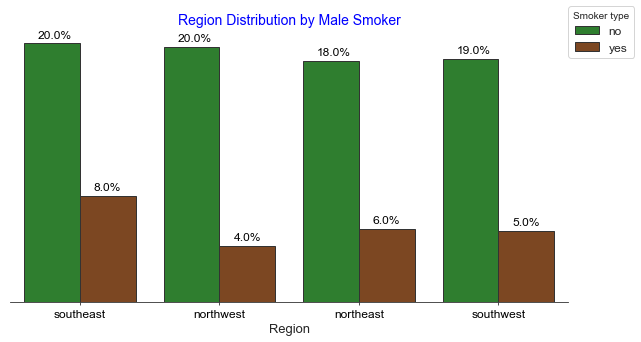

In [8]:
## Region Distribution by Male Smoker
male_data = df[df.sex=='male']
female_data = df[df.sex=='female']

def sex_dist(data,gender,title_color):    
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x='region', data=data, palette=['ForestGreen','saddlebrown'],hue='smoker',
                  hue_order=['no','yes'],orient='v',ax=ax,edgecolor='0.2')
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.1, i.get_height()+3, \
                str(round((i.get_height()/data.region.shape[0])*100))+'%', fontsize=12,
                    color='black') 
    ax.set_xlabel("Region", fontsize=13)
    ax.tick_params(length=3,labelsize=12,labelcolor='black')
    ax.set_title('Region Distribution by '+ gender +' Smoker', fontsize=14,color=title_color)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[1,0.9],fontsize=12,title='Smoker type')
    sns.despine(left=True)
    return plt.show()

sex_dist(male_data,'Male','blue')

## Region Distribution by Female Smoker

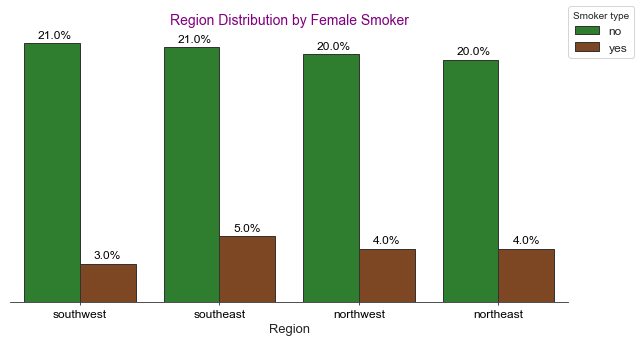

In [9]:
sex_dist(female_data,'Female','purple')


To check...if BMI is Normaly Distributed

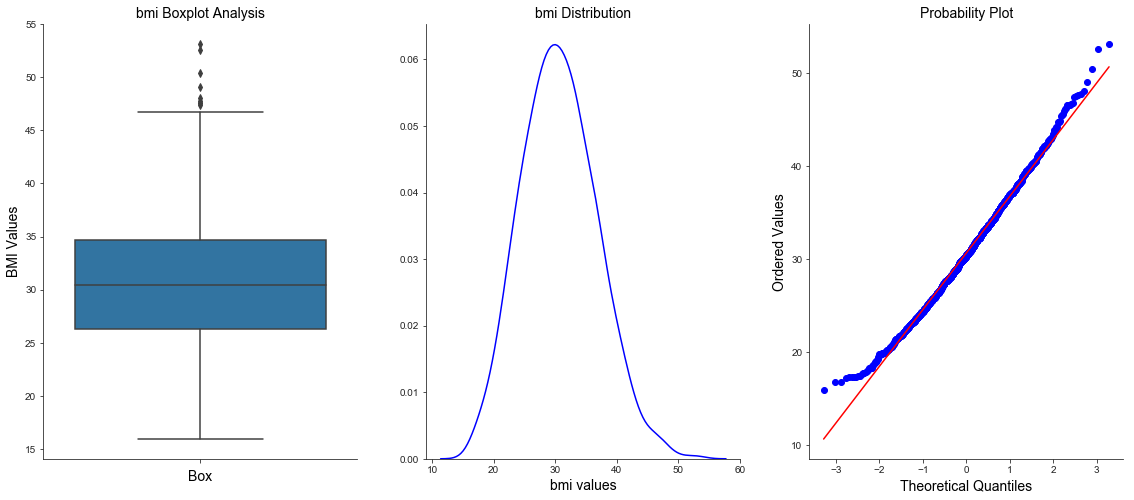

In [42]:
from scipy import stats
from scipy.stats import norm, skew,kurtosis

def data_transform(data,input):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(8,8))
    #plots
    sns.boxplot(x=input, data = data,ax=ax1,orient='v')
    sns.distplot(data[input],ax=ax2,color='blue',hist=False)
    res = stats.probplot(data[input], plot=ax3)

    axes = [ax1,ax2]
    kwargs = {'fontsize':14,'color':'black'}
    #for i in range(len(axes)):
        #x_axis = axes[i].axes.get_yaxis().set_visible(False)
    ax1.set_title(input+' Boxplot Analysis',**kwargs)
    ax1.set_xlabel('Box',**kwargs)
    ax1.set_ylabel('BMI Values',**kwargs)

    ax2.set_title(input+' Distribution',**kwargs)
    ax2.set_xlabel(input+' values',**kwargs)

    ax3.set_title('Probability Plot',**kwargs)
    ax3.set_xlabel('Theoretical Quantiles',**kwargs)
    ax3.set_ylabel('Ordered Values',**kwargs)

    f.subplots_adjust(wspace=0.22,right= 2)
    sns.despine()
    return plt.show()

data_transform(df,'bmi')


Comment: The technique used to check for normality is the probability plot that derive from the QQ-plot. By observing the probability plot, we can see that the data fit the line almost perfectly except on the two tails. the data on the tails are a little bit above the line, which means the tails are a little longer. The longer tails are usually due to Outliers.

## Categorize BMI value

classification group from the BMI value
1. Underweight if bmi value is between 14 - 18.99
2. Normal if bmi value is btw 19 - 24.99
3. Overweight if bmi value is btw 25 - 29.99
4. Obese if bmi value is above 30


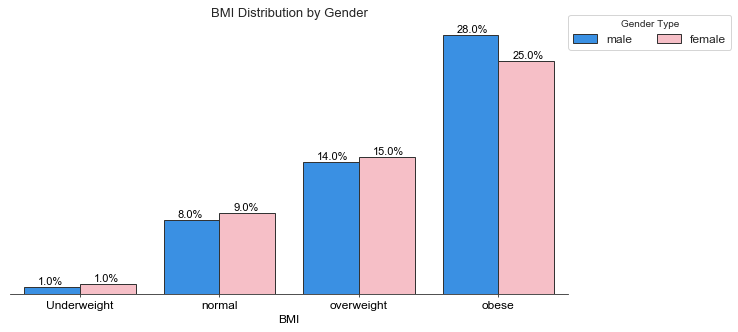

In [11]:
cut_points = [14,19,25,30,65]
label_names = ['Underweight',"normal","overweight","obese"]
df["bmi_cat"] = pd.cut(df['bmi'],cut_points,labels=label_names)
gender_dist_plot('bmi_cat','BMI')

## Charges Feature Analysis

To check how charge feature is distributed. It will be better for our model if the charge feature is normally distributed or have few outliers

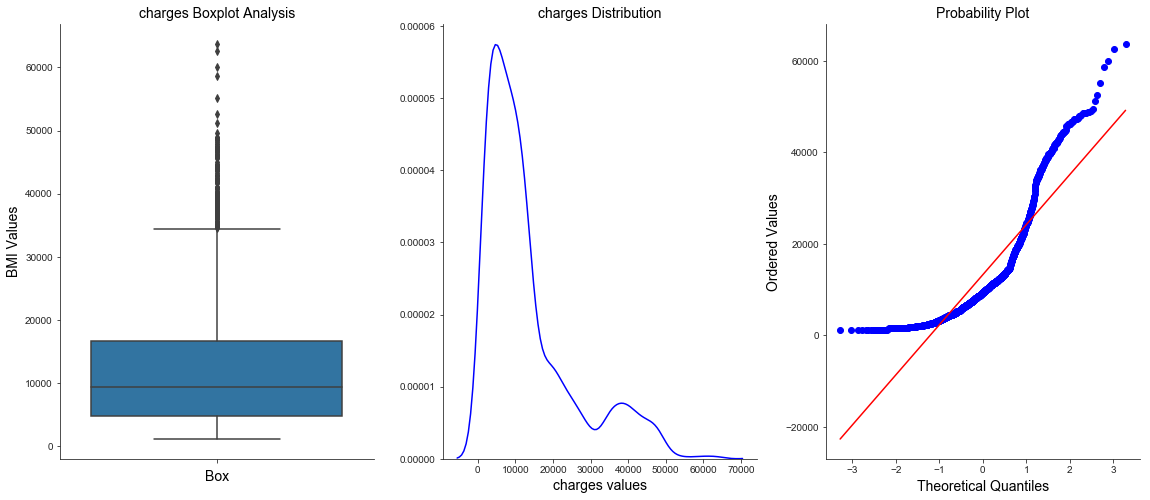

In [12]:
data_transform(df,'charges')

Distribution of Charges

Types of Distributions: We have a right skewed distribution in which most patients are being charged between  2000− 12000.

Using Logarithms: Logarithms helps us have a normal distribution which could help us in a number of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive model.
    

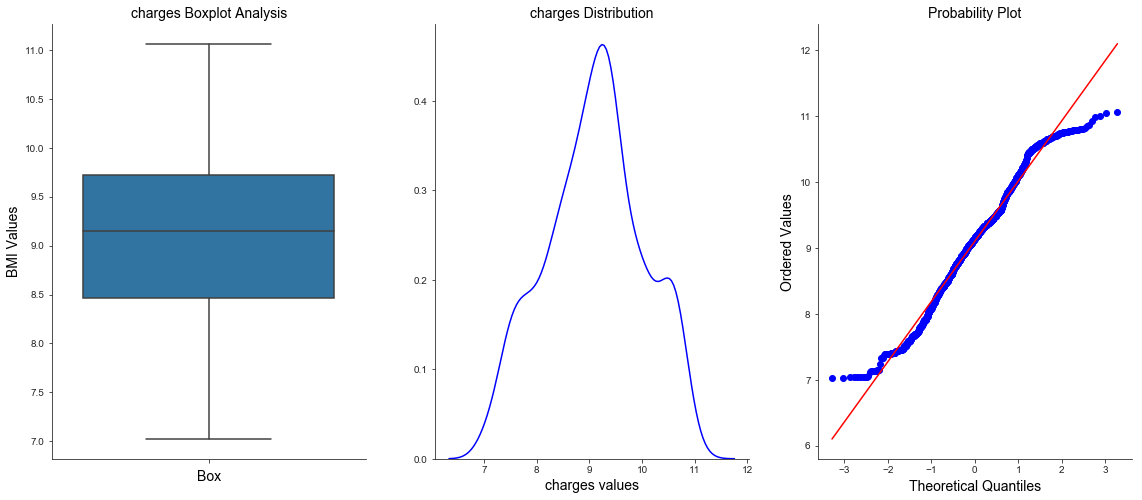

In [13]:
df.charges = np.log1p(df.charges)
data_transform(df,'charges')

Machine Learning
This problem is a Multivariate Linear Regression. I am going to approach this technique in two different ways:
 1. Using Linear Regression 
 2. Using Other Machine Learning method



## Scatter Plot Analysis

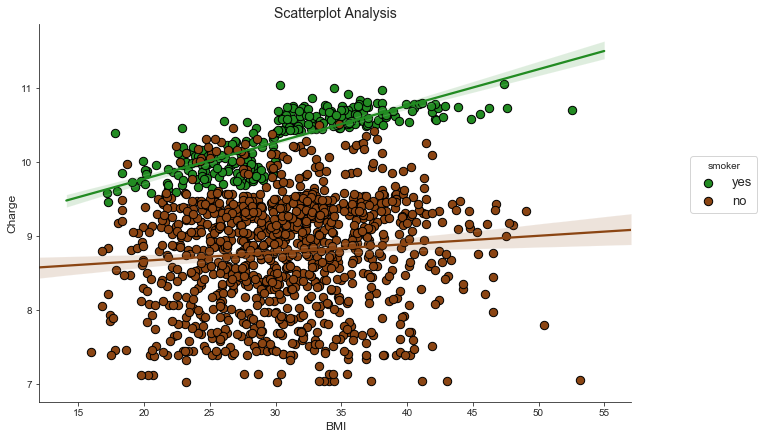

In [14]:
def scatter_analysis(hue_type,palette,data):
    sns.lmplot(x = 'bmi',y='charges',hue=hue_type,data=data,palette=palette,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)
    plt.title('Scatterplot Analysis',fontsize=14)
    plt.xlabel('BMI',fontsize=12)
    plt.ylabel('Charge',fontsize=12)
    plt.legend(loc=[1.1,0.5],title = hue_type, fontsize=13)
plt.show()
scatter_analysis('smoker',['ForestGreen','saddlebrown'],df)

1. Smoker are charged generally more than Non smokers 
2. There is an increase in charge amount for Smoker as their bmi values increase. which imply a linear relationship in the case of smoker 
3. But for non-smoker, the charge tend to be inconsistent no matter bmi value. 

## Correlation Analysis

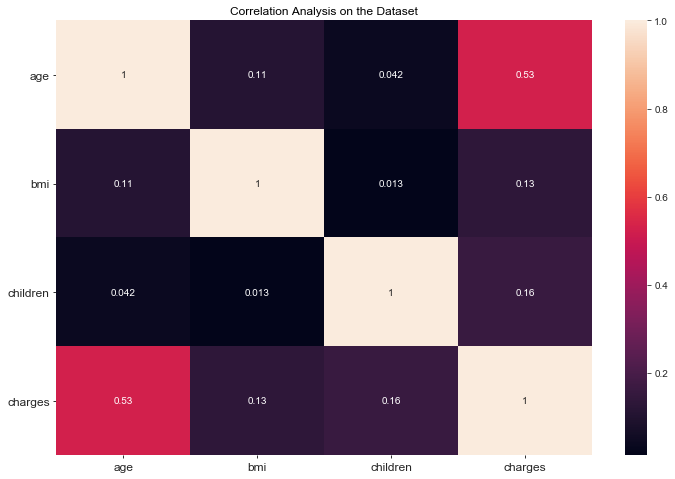

In [15]:
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df.corr(),annot=True,robust=True)
plt.title('Correlation Analysis on the Dataset',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

The analysis on the dataset as a whole only show a strong correlation with the Age but we know from the scatter plot above that they may be a correlation with bmi if you are a smoker. So, we will split the dataset into two parts as mention above and performs the analysis on each category

## Part 1: Smoker Dataset Analysis

In [16]:
#Let drop all categorical variable create during the EDA Analysis
df.drop(['age_cat','bmi_cat'],axis=1,inplace=True)
##Split the data into smoker dataset and non-smoker dataset
df_smoker = df[df.smoker=='yes']
# Convert all categorical columns in the dataset to Numerical for the Analysis
df_smoker = pd.get_dummies(df_smoker,drop_first=True)
from scipy.stats import pearsonr

## Statistical Analysis

Early above, the scatter plot was indicating that there is a relationship between the bmi values and the charges. Two analytic methods (Correlation and p_value analysis) will be performed to determine if the relationship can be proven statistically.

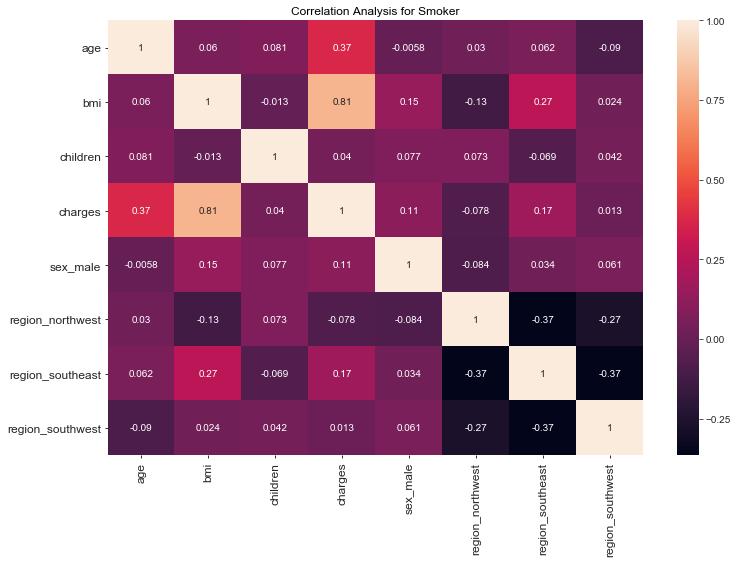

In [17]:
# Correlation Analysis
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df_smoker.corr(),annot=True,robust=True)
plt.title('Correlation Analysis for Smoker',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

There is a strong Correlation between the bmi and age parameters and charges. However there are no correlation between others parameters and Charges.

In [18]:
# p_value Analysis
p_value = [round(pearsonr(df_smoker['charges'],df_smoker[i])[1],4) for i in df_smoker.columns]
pvalue_table = pd.DataFrame(p_value,df_smoker.columns).reset_index()
pvalue_table.columns=['colmuns_name','p_value']
pvalue_table.sort_values('p_value')


,colmuns_name,p_value
0,age,0.0000
1,bmi,0.0000
3,charges,0.0000
6,region_southeast,0.0042
4,sex_male,0.0681
5,region_northwest,0.1961
2,children,0.5067
7,region_southwest,0.8315


 if we set our threshold of p_value = 0.05, which mean a p_value below 0.05 will be statistically significant, The Table above shows that age, bmi and region_southeast are statistically significant and in their relationship with the charges. Now, we have to check weather the parameters which are statistically significant are not correlated among each other if we check back on the correlation graph, we observed that (bmi - region_southeast) have a correlation score of 0.27, (age - bmi) 0.06, and (age - region_southeast) 0.062. Due to a high correlation between (bmi - region_southeast) but a low correlation between (region_southeast - charges) I think any contribution of the region_southeast parameter to the model will be absorbed in bmi parameter. Conclusion we will drop all the columns with low p_value(less than 0.05) including region_southeast

No handles with labels found to put in legend.


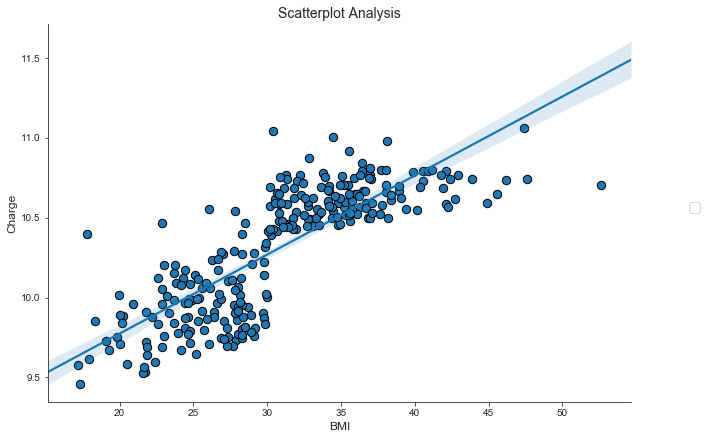

In [19]:
# Scatter plot Analysis for smoker
df_smoker.drop(['children','sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],axis=1,inplace=True)
scatter_analysis(None,['ForestGreen','saddlebrown'],df_smoker)


Now we know this age and bmi have a relationship with charges and from the scatter plot, that relationship seems to be linear. Therefore we will use a linear model for the machine leaning analysis also called Multivariate Linear Regression. The model used for our prediction will be of the form y_predict = intercept + cte1 x age + cte2 x bmi where intercept, cte_1 and cte_2 are all constant that we will be trying to find

##  Multivariate Linear Regression Analysis for Smoker

In [39]:
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [21]:
# Multivariate Model built & Coefficient
X = df_smoker.drop('charges',axis=1)
y = df_smoker['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
## Build  & Evaluate our Model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('intercept: {:.4f} \ncte1: {:.4f} \ncte2: {:.4f}'.format(model.intercept_,model.coef_[0],model.coef_[1]))

print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_pred,y_test),np.sqrt(mean_squared_error(y_pred,y_test))))

intercept: 10.2893 
cte1: 0.1136 
cte2: 0.3073
Model_Accuracy_Score (R Square): 0.6548 
Loss(RMSE): 0.2099


The model accuracy score being about 0.6 the loss is less than 0.2. Now let visualize the predicted values vs. testvalues on a scatter plot. What we expect is to see the point group together and forming a linear trend so that a point will have close value from the x and y axis.

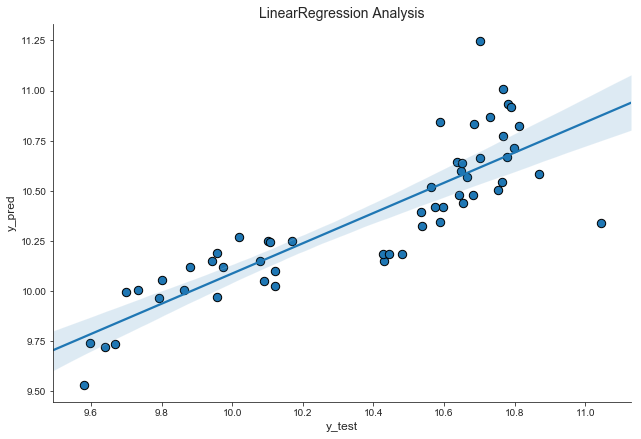

In [22]:
# Linear Regression Visualization Result for Smoker
def model_scatter_plot(model):
    title = str(model)
    title = title.split('.')[3]
    title = title.replace("'>",'')
    lreg = model()
    lreg.fit(X_train,y_train)
    y_pred = lreg.predict(X_test)
    #model_table
    model_table = pd.DataFrame(y_pred,y_test).reset_index()
    model_table.columns=['y_test','y_pred']
    #Model Graph
    sns.lmplot(x = 'y_test',y='y_pred',data = model_table,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},fit_reg=True)
    plt.title(title +' Analysis',fontsize=14)
    plt.xlabel('y_test',fontsize=12)
    plt.ylabel('y_pred',fontsize=12)
    #plt.scatter(y_test,y_pred)
    return plt.show()

model_scatter_plot(LinearRegression)

### Test the Model on real data

In [23]:
def model_apply(age,bmi_value):
    ## Exple: for a smoker who is age number with bmi = bmi_value, 
    #how much would he pay for insurance
    c = [[age, bmi_value]]
    #we have to transform the data from the standard scaler
    c = sc.transform(c)
    charge_value = model.coef_[0]*(c[0][0]) + model.coef_[1]*(c[0][1]) + model.intercept_
    charge_value = np.exp(charge_value) 
    x = ('The Insurrance Charges for a {:.1f} years old person who is a Smoker with an bmi = {:.1f} will be {:.4f}'.format(age,bmi_value,charge_value))
    # we use the np.exp() because we transformed the value of charge during the charge EDA earlier above
    return print(x)


In [24]:
#if you are a smoker of 19 yr old and bmi of 32 then what insurrance would you be charged?
model_apply(19,32)

The Insurrance Charges for a 19.0 years old person who is a Smoker with an bmi = 32.0 will be 27084.1826


## Explore Other Machine Learning Models

For these other models, the advantage the have is their flexibility and disadvantage is their Interpretability. In these models we are not looking for coefficient cuz they are None. So, the model will be evaluated base on the R square and minimal loss.

[20:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


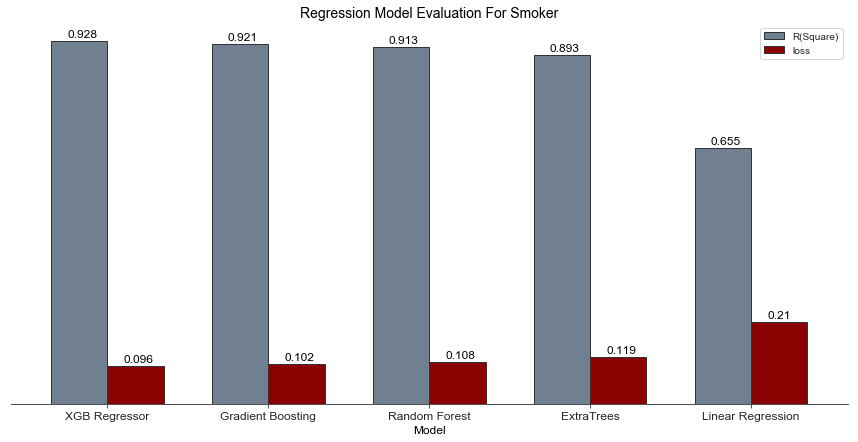

In [25]:
# Models Score visualisation for other Machine Learning methods for smoker
def robust_model(input):
    #Model type to evaluate
    model_list = [ExtraTreesRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),
            LinearRegression(),xgb.XGBRegressor()]
    r_score = []
    loss = []
    for reg in model_list:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r_score.append(explained_variance_score(y_pred,y_test))
        loss.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    ## Model score table
    model_str = ['ExtraTrees','Random Forest','Gradient Boosting',
            'Linear Regression','XGB Regressor']
    other_model = pd.DataFrame(r_score,model_str).reset_index()
    other_model.columns = ['Model','R(Square)']
    other_model['loss'] = loss
    other_model.sort_values('R(Square)',ascending=False,inplace=True)
    ## Model Graph
    ax = other_model[['R(Square)','loss']].plot(kind='bar',width=0.7,
                            figsize=(15,7), color=['slategray', 'darkred'], fontsize=13,edgecolor='0.2')
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()+0.01, \
                str(round((i.get_height()), 3)), fontsize=12, color='black',)
    ax.set_title('Regression Model Evaluation For '+input,fontsize=14,color='black')
    ax.set_xticklabels(other_model.Model, rotation=0, fontsize=12)
    ax.set_xlabel('Model',**kwargs)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    sns.despine(left=True)
    return plt.show()

robust_model('Smoker')

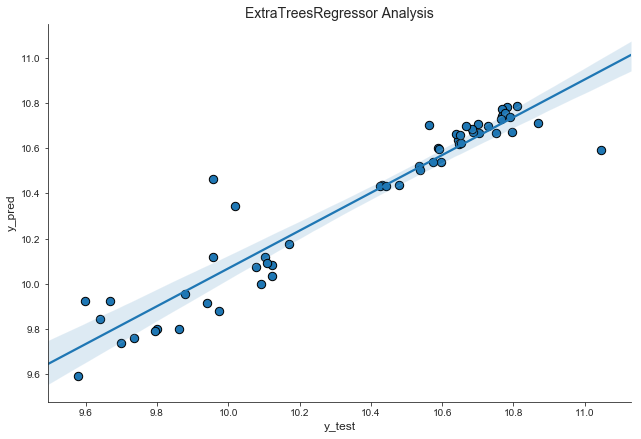

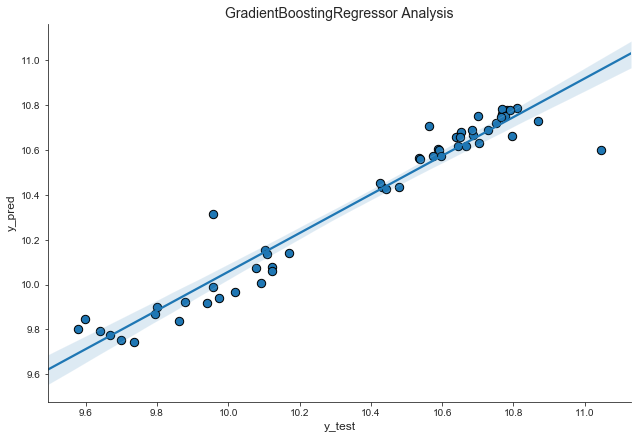

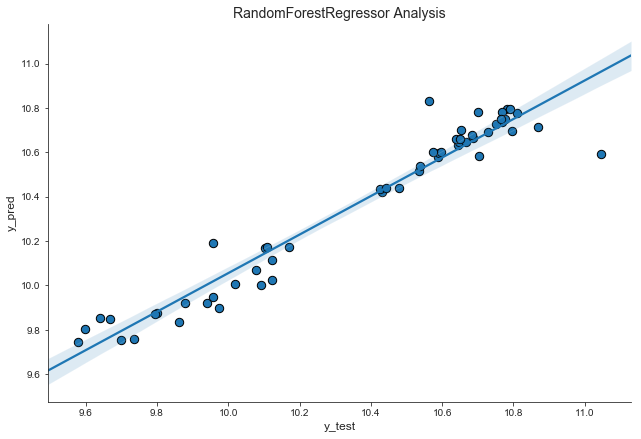

In [26]:
# Model Visualization for other Machine Learning Methods
model_scatter_plot(ExtraTreesRegressor)

model_scatter_plot(GradientBoostingRegressor)

model_scatter_plot(RandomForestRegressor)



## Part 2: Non-Smoker

No handles with labels found to put in legend.


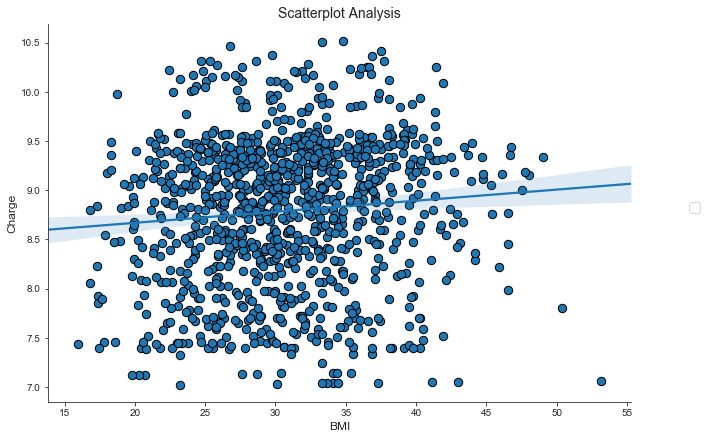

In [27]:
# Scatter plot analysis for non-smoker
df_non_smoker = df[df.smoker=='no']

scatter_analysis(None,['ForestGreen','saddlebrown'],df_non_smoker)


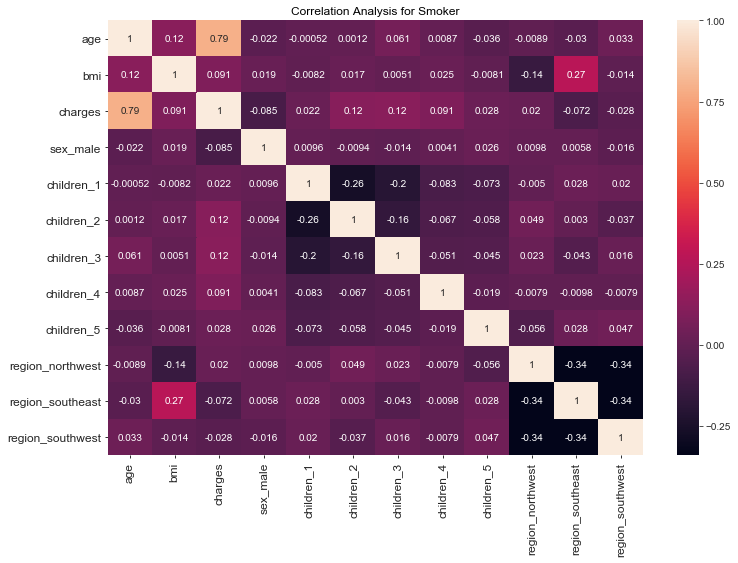

In [28]:
# Convert all categorical columns in the dataset to Numerical for the Analysis
df_non_smoker['children'] = df_non_smoker['children'].astype('category')
df_non_smoker = pd.get_dummies(df_non_smoker,drop_first=True)
#correlation Analysis
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df_non_smoker.corr(),annot=True,robust=True)
plt.title('Correlation Analysis for Smoker',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

From the heat map above we can observe that only the age is strongly correlated to the charges

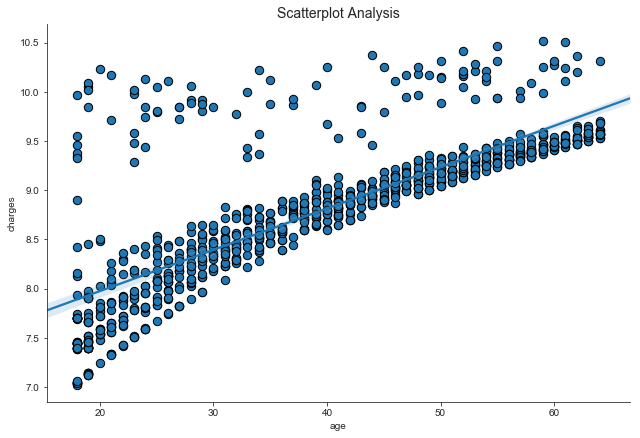

In [29]:
# Scatter plot of Age Vs Charges
sns.lmplot(x = 'age',y='charges',data=df_non_smoker,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)
plt.title('Scatterplot Analysis',fontsize=14)
plt.show()



### Simple Linear Regression Analysis for Non Smoker
Because only Age in correlated to charges, we are going to use a simple linear model for this section. So, there will be only one coefficient and intercept that we need to find



In [35]:
X = df_non_smoker['age']
y = df_non_smoker['charges']
X = X.values.reshape(-1, 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Model fitting
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('intercept: {:.4f} \ncte1: {:.4f}'.format(model.intercept_,model.coef_[0]))

print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_pred,y_test),np.sqrt(mean_squared_error(y_pred,y_test))))

intercept: 8.7835 
cte1: 0.5905
Model_Accuracy_Score (R Square): 0.4755 
Loss(RMSE): 0.4364


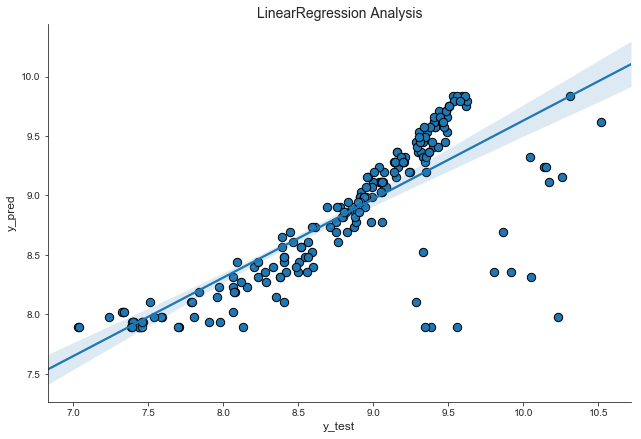

In [36]:
# Linear Regression Visualization Result For Non Smoker
model_scatter_plot(LinearRegression)

The scatter plot of the predicted vs. test values for non smoker show that the age distribution need to be transformed to have a better age distribution